## The dataset contains various columns that represent traffic violations categorized by time period, along with street information and other details issued by the District of Columbia's Metropolitan Police Department (MPD) and partner agencies.We import libraries like Pandas for data manipulation, and Matplotlib and Seaborn for visualizations.  

### link for the dataset that I used for this analysis is mentioned below 
https://catalog.data.gov/dataset/moving-violations-summary-for-2014


In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    mvs_copy_data = pd.read_csv("mvs-Copy1.csv")
    print("CSV file successfully loaded.")
except FileNotFoundError:
    print("Error: The file 'mvs-Copy1.csv' was not found. Please check the file path.")
mvs_copy_data.shape

CSV file successfully loaded.


(25267, 52)

In [160]:
### lets start by initial data cleaning: checking for duplicates, data structure, and missing values to ensure data quality.

In [161]:
mvs_copy_data.duplicated().sum()# checking duplicates 

0

In [162]:
mvs_copy_data.columns

Index(['OBJECTID', 'STREETSEG', 'WEEKNUMBER', 'HIGHSPEED_AM_NORUSH',
       'HIGHSPEED_AM_RUSH', 'HIGHSPEED_EVENING', 'HIGHSPEED_NO_TIME',
       'HIGHSPEED_OVERNIGHT', 'HIGHSPEED_PM_NORUSH', 'HIGHSPEED_PM_RUSH',
       'LOWSPEED_AM_NORUSH', 'LOWSPEED_AM_RUSH', 'LOWSPEED_EVENING',
       'LOWSPEED_NO_TIME', 'LOWSPEED_OVERNIGHT', 'LOWSPEED_PM_NORUSH',
       'LOWSPEED_PM_RUSH', 'OTHER_AM_NORUSH', 'OTHER_AM_RUSH', 'OTHER_EVENING',
       'OTHER_NO_TIME', 'OTHER_OVERNIGHT', 'OTHER_PM_NORUSH', 'OTHER_PM_RUSH',
       'UNSAFEDRIVING_AM_NORUSH', 'UNSAFEDRIVING_AM_RUSH',
       'UNSAFEDRIVING_EVENING', 'UNSAFEDRIVING_NO_TIME',
       'UNSAFEDRIVING_OVERNIGHT', 'UNSAFEDRIVING_PM_NORUSH',
       'UNSAFEDRIVING_PM_RUSH', 'UNSAFEOPER_AM_NORUSH', 'UNSAFEOPER_AM_RUSH',
       'UNSAFEOPER_EVENING', 'UNSAFEOPER_NO_TIME', 'UNSAFEOPER_OVERNIGHT',
       'UNSAFEOPER_PM_NORUSH', 'UNSAFEOPER_PM_RUSH', 'UNSAFEVEHICLE_AM_NORUSH',
       'UNSAFEVEHICLE_AM_RUSH', 'UNSAFEVEHICLE_EVENING',
       'UNSAFEVEHICLE

In [163]:
mvs_copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25267 entries, 0 to 25266
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OBJECTID                 25267 non-null  int64  
 1   STREETSEG                25267 non-null  int64  
 2   WEEKNUMBER               25267 non-null  int64  
 3   HIGHSPEED_AM_NORUSH      25267 non-null  int64  
 4   HIGHSPEED_AM_RUSH        25267 non-null  int64  
 5   HIGHSPEED_EVENING        25267 non-null  int64  
 6   HIGHSPEED_NO_TIME        25267 non-null  int64  
 7   HIGHSPEED_OVERNIGHT      25267 non-null  int64  
 8   HIGHSPEED_PM_NORUSH      25267 non-null  int64  
 9   HIGHSPEED_PM_RUSH        25267 non-null  int64  
 10  LOWSPEED_AM_NORUSH       25267 non-null  int64  
 11  LOWSPEED_AM_RUSH         25267 non-null  int64  
 12  LOWSPEED_EVENING         25267 non-null  int64  
 13  LOWSPEED_NO_TIME         25267 non-null  int64  
 14  LOWSPEED_OVERNIGHT    

In [164]:
mvs_copy_data.describe() 

,OBJECTID,STREETSEG,WEEKNUMBER,HIGHSPEED_AM_NORUSH,HIGHSPEED_AM_RUSH,HIGHSPEED_EVENING,HIGHSPEED_NO_TIME,HIGHSPEED_OVERNIGHT,HIGHSPEED_PM_NORUSH,HIGHSPEED_PM_RUSH,...,UNSAFEVEHICLE_AM_RUSH,UNSAFEVEHICLE_EVENING,UNSAFEVEHICLE_NO_TIME,UNSAFEVEHICLE_OVERNIGHT,UNSAFEVEHICLE_PM_NORUSH,UNSAFEVEHICLE_PM_RUSH,FROMADDRESSLEFTTHEO,TOADDRESSLEFTTHEO,SHAPE_,SHAPELEN
count,25267.000000,25267.000000,25267.00000,25267.000000,25267.000000,25267.000000,25267.000000,25267.000000,25267.000000,25267.000000,...,25267.000000,25267.000000,25267.000000,25267.000000,25267.000000,25267.000000,25200.000000,25200.000000,0.0,25267.0
mean,12634.000000,5366.761903,25.67887,0.076068,0.081608,0.040844,0.000119,0.051094,0.153006,0.078244,...,0.006728,0.019155,0.000435,0.037915,0.025409,0.018997,2021.860833,2113.151468,NaN,0.0
std,7294.098962,3987.805281,14.72844,1.037296,1.297290,0.497196,0.010896,0.718711,1.800007,0.952450,...,0.096822,0.149768,0.020861,0.211076,0.187229,0.171932,1676.563003,1675.646760,NaN,0.0
min,1.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0
25%,6317.500000,1834.000000,13.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,734.000000,898.000000,NaN,0.0
50%,12634.000000,4653.000000,25.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,1608.000000,NaN,0.0
75%,18950.500000,8371.000000,38.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3000.000000,3098.000000,NaN,0.0
max,25267.000000,15484.000000,53.00000,75.000000,107.000000,20.000000,1.000000,51.000000,74.000000,41.000000,...,4.000000,4.000000,1.000000,5.000000,5.000000,8.000000,9999.000000,9999.000000,NaN,0.0


In [165]:
mvs_copy_data.isnull().sum() # checking null value 


OBJECTID                       0
STREETSEG                      0
WEEKNUMBER                     0
HIGHSPEED_AM_NORUSH            0
HIGHSPEED_AM_RUSH              0
HIGHSPEED_EVENING              0
HIGHSPEED_NO_TIME              0
HIGHSPEED_OVERNIGHT            0
HIGHSPEED_PM_NORUSH            0
HIGHSPEED_PM_RUSH              0
LOWSPEED_AM_NORUSH             0
LOWSPEED_AM_RUSH               0
LOWSPEED_EVENING               0
LOWSPEED_NO_TIME               0
LOWSPEED_OVERNIGHT             0
LOWSPEED_PM_NORUSH             0
LOWSPEED_PM_RUSH               0
OTHER_AM_NORUSH                0
OTHER_AM_RUSH                  0
OTHER_EVENING                  0
OTHER_NO_TIME                  0
OTHER_OVERNIGHT                0
OTHER_PM_NORUSH                0
OTHER_PM_RUSH                  0
UNSAFEDRIVING_AM_NORUSH        0
UNSAFEDRIVING_AM_RUSH          0
UNSAFEDRIVING_EVENING          0
UNSAFEDRIVING_NO_TIME          0
UNSAFEDRIVING_OVERNIGHT        0
UNSAFEDRIVING_PM_NORUSH        0
UNSAFEDRIV

### columns FROMADDRESSLEFTTHEO and TOADDRESSLEFTTHEO have 67 missing values and SHAPE has 25267 missing values.  We are not using the FROMADDRESSLEFTTHEO, TOADDRESSLEFTTHEO and SHAPE columns in our data analysis, so the missing values in these columns will not affect our results. Therefore, there's no need to fill in the missing data using the mean or any other method.

In [167]:
#First, let's determine which columns we will use for the analysis.
#we will be using columns from HIGHSPEED_AM_NORUSH to UNSAFEVEHICLE_PM_RUSH.
all_columns = mvs_copy_data.columns
start_idx = all_columns.get_loc('HIGHSPEED_AM_NORUSH')
end_idx = all_columns.get_loc('UNSAFEVEHICLE_PM_RUSH')

#creating a list of violation columns
violation_columns = all_columns[start_idx:end_idx + 1]

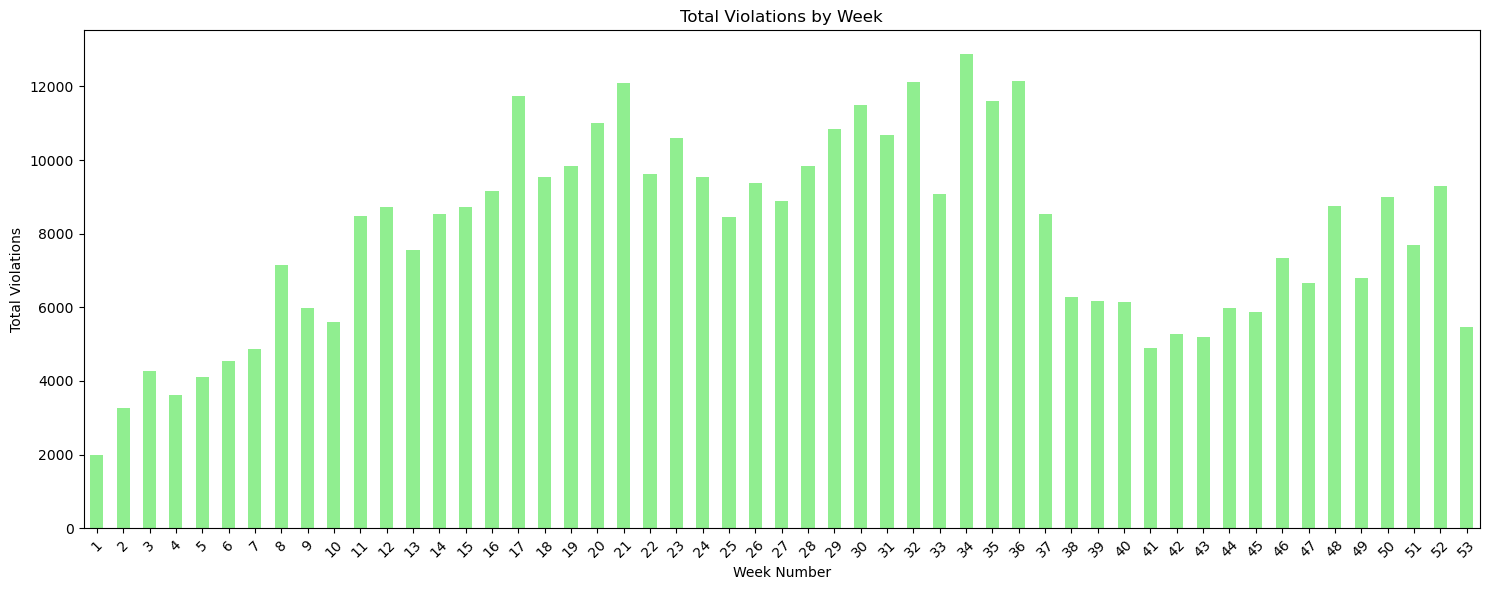

In [168]:
#To start, I want to visualize the data by plotting the total number of violations for each week.
weekly_violations = mvs_copy_data.groupby("WEEKNUMBER")[violation_columns].sum()

#column for total violations per week
weekly_violations["TOTAL_VIOLATIONS"] = weekly_violations.sum(axis=1)

# Plotting a bar chart for the week with the most violations
plt.figure(figsize=(15, 6))
weekly_violations["TOTAL_VIOLATIONS"].plot(kind="bar", color="lightgreen")
plt.title("Total Violations by Week")
plt.xlabel("Week Number")
plt.ylabel("Total Violations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### People come to DC from all over the world, as it's a major tourist attraction. Summer is the perfect time for vacations, which is why there's a lot of increased travel to the city during this period. This increase in visitors can contribute to higher numbers of traffic violations, especially when drivers are unfamiliar with the roads.

### In Week 17, the spike in violations could be linked with spring break and the Cherry Blossom Festival in Washington, DC. During this period, many people travel to DC to see the cherry blossoms that significantly increased traffic flow ( I was one of them).

### There are higher peaks around mid-year, likely during the summer months, when more people are driving due to vacations and good weather.In Week 21, as summer begins and people start going on vacations and vacation excitement and a lack of familiarity with routes can also lead to more violations.Additionally, drivers may be less focused on following traffic rules while trying to reach their holiday destinations, contributing to the rise in violations during this time.

### The spikes near the end of the year could be linked to holidays like Thanksgiving and Christmas when travel increases.

### Law enforcement efforts often can reduce the number of violations during some particular week.

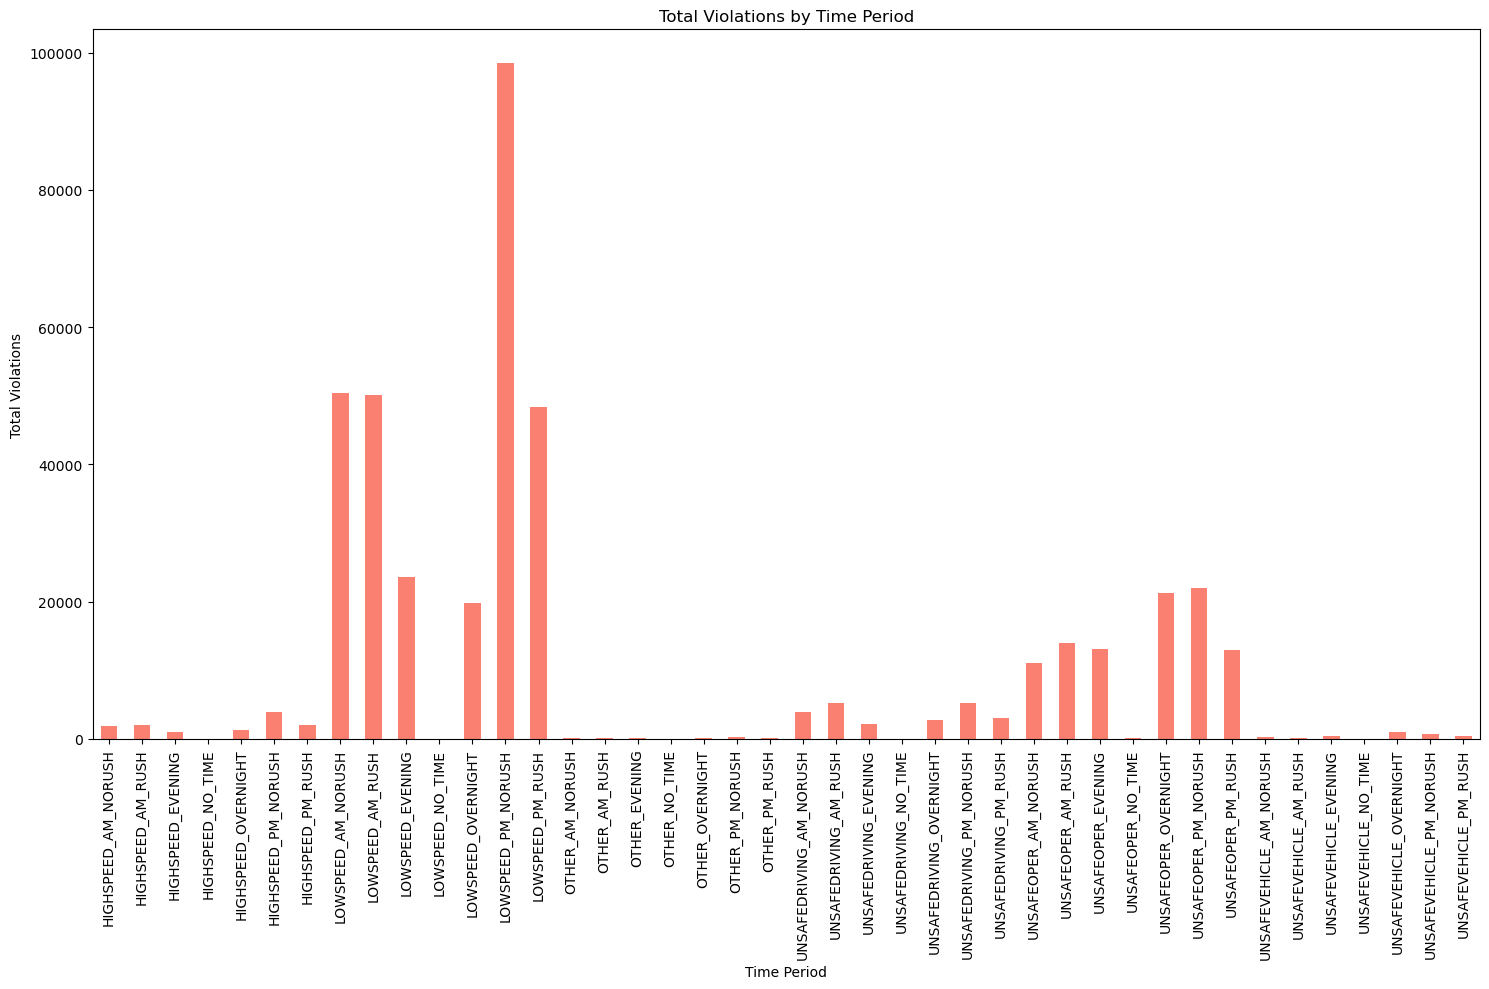

In [174]:
#I want to analyze total violations by time period to see when most violations happen.
#This helps in planning better enforcement and reducing violations.
start_idx = violation_columns.get_loc("HIGHSPEED_AM_NORUSH")
end_idx = violation_columns.get_loc("UNSAFEVEHICLE_PM_RUSH")

#select all columns from HIGHSPEED_AM_NORUSH to UNSAFEVEHICLE_PM_RUSH
time_period_columns = violation_columns[start_idx:end_idx + 1]
time_period_violations = mvs_copy_data[time_period_columns].sum()

#plotting a bar chart for violations by time period
plt.figure(figsize=(15, 10))
time_period_violations.plot(kind='bar', color='salmon')
plt.title('Total Violations by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Total Violations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### ### The data shows that driving too slowly is causing many more violations compared to speeding. DC is known for its complex road layouts. Navigating through unfamiliar and confusing road designs often results in unintentional low-speed violations. In my opinion, another contributing factor is impaired driving, which often happens more during the PM non-rush hours. Drivers under the influence of alcohol or drugs tend to drive cautiously, which often results in slow driving. lets analyze the data of low speed violations.

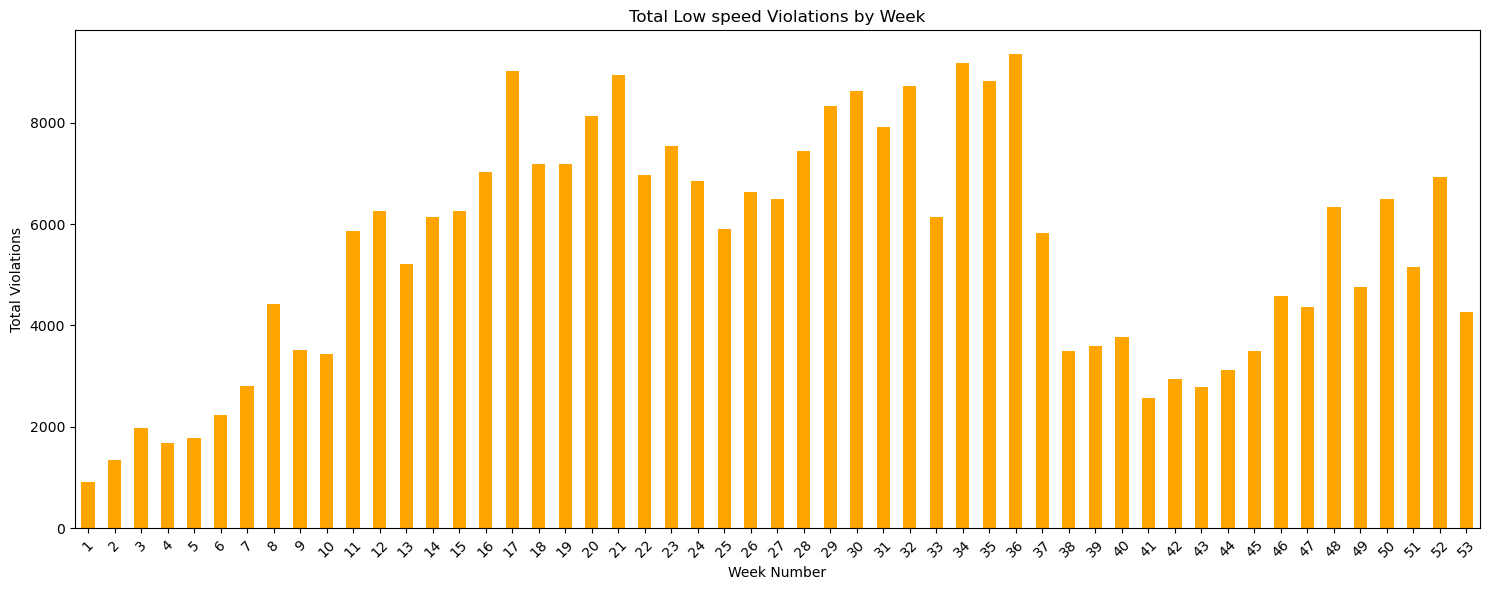

In [176]:
## Now I want to analyze the violation data that occurred due to low speeds.
all_columns = mvs_copy_data.columns
start_idx = all_columns.get_loc('LOWSPEED_AM_NORUSH')
end_idx = all_columns.get_loc('LOWSPEED_PM_RUSH')

#creating a list of violation columns
low__speed_violation_columns = all_columns[start_idx:end_idx + 1]
#To start, I want to visualize the data by plotting the total number of low speed violations for each week.
lowspeed_weekly_violations = mvs_copy_data.groupby('WEEKNUMBER')[low__speed_violation_columns].sum()

#column for total low speed violations per week
lowspeed_weekly_violations['TOTAL_LOWSPEED_VIOLATIONS'] = lowspeed_weekly_violations.sum(axis=1)
# Plotting a bar chart for the week with the most violations
plt.figure(figsize=(15, 6))
lowspeed_weekly_violations['TOTAL_LOWSPEED_VIOLATIONS'].plot(kind='bar', color='orange')
plt.title('Total Low speed Violations by Week')
plt.xlabel('Week Number')
plt.ylabel('Total Violations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### The figure showing total low-speed violations has a similar pattern to the total violations chart. To better understand their relationship, let's compare both datasets by plotting them as line charts.

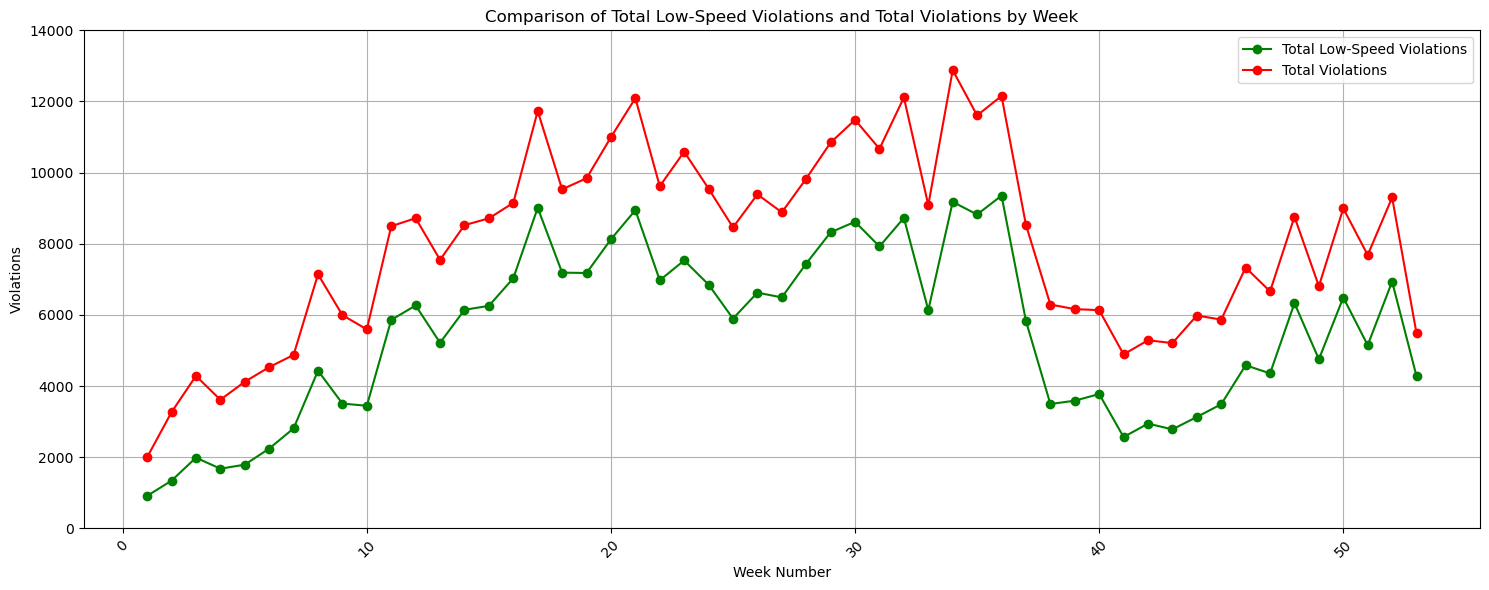

In [178]:
plt.figure(figsize=(15, 6))
#plotting the total low-speed violations per week
plt.plot(lowspeed_weekly_violations.index, lowspeed_weekly_violations["TOTAL_LOWSPEED_VIOLATIONS"], marker="o", linestyle="-", color='green', label='Total Low-Speed Violations')

#plotting the total number of violations per week
plt.plot(weekly_violations.index, weekly_violations["TOTAL_VIOLATIONS"], marker="o", linestyle="-", color="red", label="Total Violations")
plt.title("Comparison of Total Low-Speed Violations and Total Violations by Week")
plt.xlabel("Week Number")
plt.ylabel("Violations")
plt.xticks(rotation=45)
plt.ylim(0, 14000)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### This chart shows that low-speed violations (green line) are a major contributor to the total violations (red line), as both lines follow similar trends throughout the year. Violations are higher in the middle of the year, which is during the summer, and lower at the beginning and end of the year, likely in winter.The spikes near the end of the year could be linked to holidays like Thanksgiving and Christmas when travel increases.

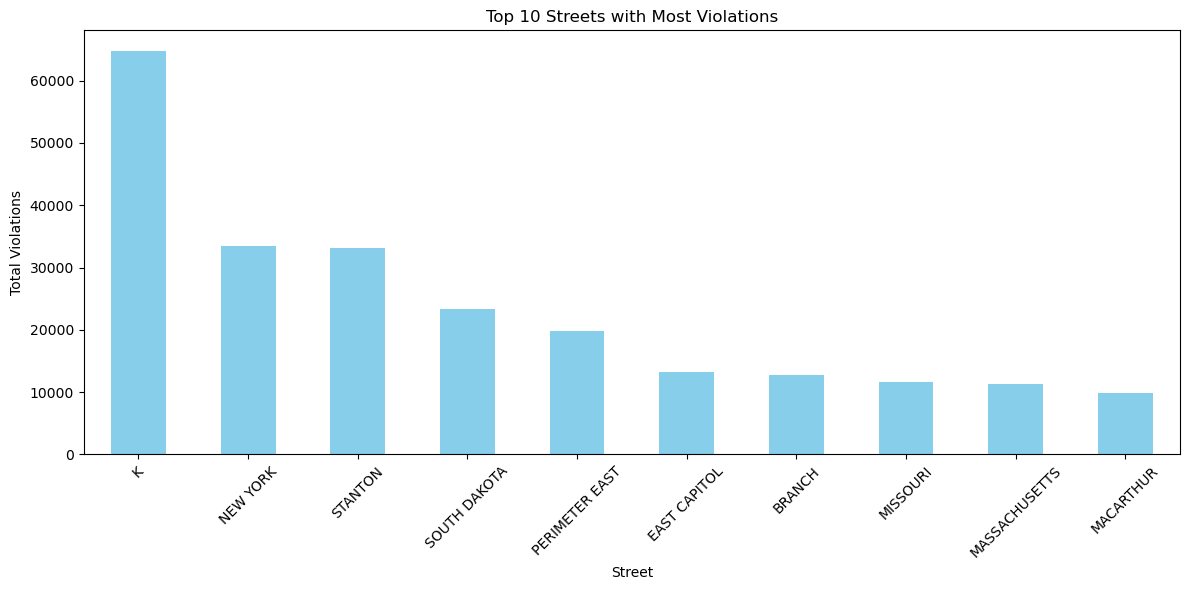

In [180]:
# now we calculate the total violations per street using the selected columns. 
#This will help us determine which street has the highest number of violations and consider possible solutions to reduce those violations.
street_violations = mvs_copy_data.groupby("REGISTEREDNAME")[violation_columns].sum()

#adding a column for the total violations per street
street_violations["TOTAL_VIOLATIONS"] = street_violations.sum(axis=1)
top_10_streets = street_violations["TOTAL_VIOLATIONS"].sort_values(ascending=False).head(10)

#plotting the top 10 streets with the most violations
plt.figure(figsize=(12, 6))
top_10_streets.plot(kind="bar", color="skyblue")
plt.title("Top 10 Streets with Most Violations")
plt.xlabel("Street")
plt.ylabel("Total Violations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### This chart shows the streets with the most violations, with K, New York, and Stanton having the highest numbers. I want to look at the data for each street up to East Capitol in more detail.

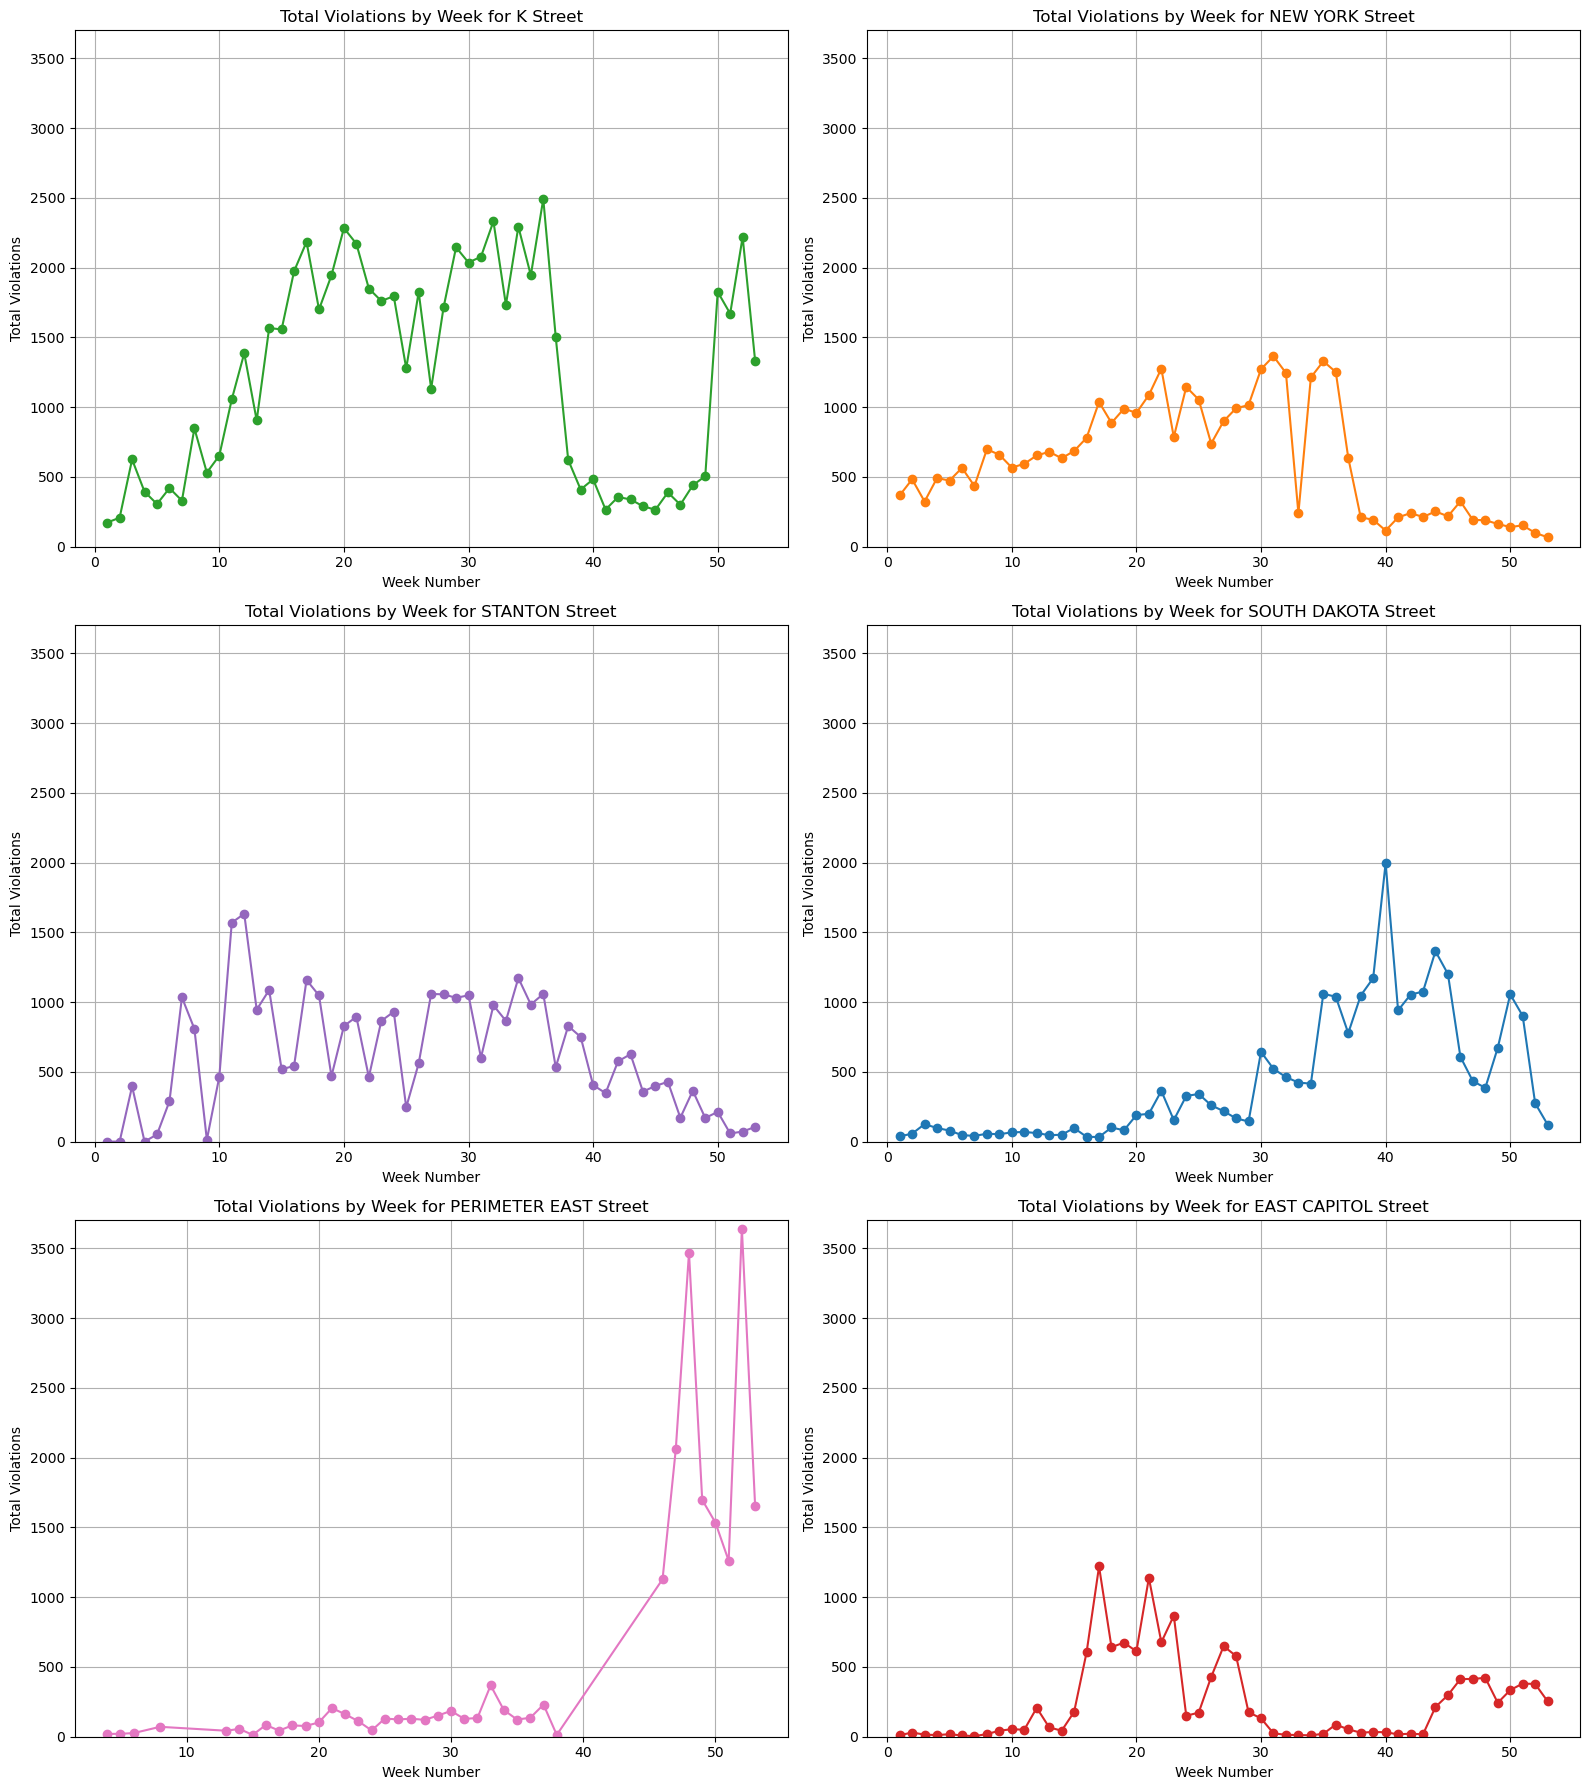

In [182]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
max_y_value = 3700

#plot the line chart for each street
# 1.  K Street
k_street_data = mvs_copy_data[mvs_copy_data["REGISTEREDNAME"].str.contains(r'\bK\b', case=False, na=False)]
weekly_k_street_violations = k_street_data.groupby("WEEKNUMBER")[violation_columns].sum()
weekly_k_street_violations["TOTAL_VIOLATIONS"] = weekly_k_street_violations.sum(axis=1)
axes[0, 0].plot(weekly_k_street_violations.index, weekly_k_street_violations["TOTAL_VIOLATIONS"], marker="o", color="tab:green")
axes[0, 0].set_title("Total Violations by Week for K Street")
axes[0, 0].set_xlabel("Week Number")
axes[0, 0].set_ylabel("Total Violations")
axes[0, 0].grid(True)
axes[0, 0].set_ylim(0, max_y_value)

# 2. NEW YORK Street
new_york_street_data = mvs_copy_data[mvs_copy_data["REGISTEREDNAME"].str.contains(r'\bNEW YORK\b', case=False, na=False)]
weekly_new_york_street_violations = new_york_street_data.groupby("WEEKNUMBER")[violation_columns].sum()
weekly_new_york_street_violations["TOTAL_VIOLATIONS"] = weekly_new_york_street_violations.sum(axis=1)
axes[0, 1].plot(weekly_new_york_street_violations.index, weekly_new_york_street_violations["TOTAL_VIOLATIONS"], marker="o", color="tab:orange")
axes[0, 1].set_title("Total Violations by Week for NEW YORK Street")
axes[0, 1].set_xlabel("Week Number")
axes[0, 1].set_ylabel("Total Violations")
axes[0, 1].grid(True)
axes[0, 1].set_ylim(0, max_y_value)

# 3. STANTON Street
stanton_street_data = mvs_copy_data[mvs_copy_data["REGISTEREDNAME"].str.contains(r'\bSTANTON\b', case=False, na=False)]
weekly_stanton_street_violations = stanton_street_data.groupby("WEEKNUMBER")[violation_columns].sum()
weekly_stanton_street_violations["TOTAL_VIOLATIONS"] = weekly_stanton_street_violations.sum(axis=1)
axes[1, 0].plot(weekly_stanton_street_violations.index, weekly_stanton_street_violations["TOTAL_VIOLATIONS"], marker="o", color="tab:purple")
axes[1, 0].set_title("Total Violations by Week for STANTON Street")
axes[1, 0].set_xlabel("Week Number")
axes[1, 0].set_ylabel("Total Violations")
axes[1, 0].grid(True)
axes[1, 0].set_ylim(0, max_y_value)

# 4. SOUTH DAKOTA Street
south_dakota_street_data = mvs_copy_data[mvs_copy_data["REGISTEREDNAME"].str.contains(r"\bSOUTH DAKOTA\b", case=False, na=False)]
weekly_south_dakota_street_violations = south_dakota_street_data.groupby("WEEKNUMBER")[violation_columns].sum()
weekly_south_dakota_street_violations["TOTAL_VIOLATIONS"] = weekly_south_dakota_street_violations.sum(axis=1)
axes[1, 1].plot(weekly_south_dakota_street_violations.index, weekly_south_dakota_street_violations["TOTAL_VIOLATIONS"], marker="o", color="tab:blue")
axes[1, 1].set_title("Total Violations by Week for SOUTH DAKOTA Street")
axes[1, 1].set_xlabel("Week Number")
axes[1, 1].set_ylabel("Total Violations")
axes[1, 1].grid(True)
axes[1, 1].set_ylim(0, max_y_value)

# 5. PERIMETER EAST Street
perimeter_east_street_data = mvs_copy_data[mvs_copy_data["REGISTEREDNAME"].str.contains(r"\bPERIMETER EAST\b", case=False, na=False)]
weekly_perimeter_east_street_violations = perimeter_east_street_data.groupby("WEEKNUMBER")[violation_columns].sum()
weekly_perimeter_east_street_violations["TOTAL_VIOLATIONS"] = weekly_perimeter_east_street_violations.sum(axis=1)
axes[2, 0].plot(weekly_perimeter_east_street_violations.index, weekly_perimeter_east_street_violations["TOTAL_VIOLATIONS"], marker="o", color="tab:pink")
axes[2, 0].set_title("Total Violations by Week for PERIMETER EAST Street")
axes[2, 0].set_xlabel("Week Number")
axes[2, 0].set_ylabel("Total Violations")
axes[2, 0].grid(True)
axes[2, 0].set_ylim(0, max_y_value)

# 6. EAST CAPITOL Street
east_capitol_street_data = mvs_copy_data[mvs_copy_data["REGISTEREDNAME"].str.contains(r"\bEAST CAPITOL\b", case=False, na=False)]
weekly_east_capitol_street_violations = east_capitol_street_data.groupby("WEEKNUMBER")[violation_columns].sum()
weekly_east_capitol_street_violations["TOTAL_VIOLATIONS"] = weekly_east_capitol_street_violations.sum(axis=1)
axes[2, 1].plot(weekly_east_capitol_street_violations.index, weekly_east_capitol_street_violations["TOTAL_VIOLATIONS"], marker="o", color="tab:red")
axes[2, 1].set_title("Total Violations by Week for EAST CAPITOL Street")
axes[2, 1].set_xlabel("Week Number")
axes[2, 1].set_ylabel("Total Violations")
axes[2, 1].grid(True)
axes[2, 1].set_ylim(0, max_y_value)
plt.tight_layout()
plt.show()

### These line charts show the total number of traffic violations for the top six streets each week of the year, based on the bar chart above.

### from above line charts we can see K Street has the most traffic violations compared to other streets. To understand why this is happening,we should analyze the data for K Street in more detail.

### reason for fewer violations in new york street in the last few weeks could be decreased patrols or moving the camera to another location. These are just possibilities since we don't have specific details.

### the number of violations on SOUTH DAKOTA Street and PERIMETAR EAST significantly increased after the first few weeks of the year. this could be due to the deployment of new speed cameras or increased patrol presence.

AM vs PM Violations Summary:
  Time Period  Total Violations
0          AM            139144
1          PM            197390


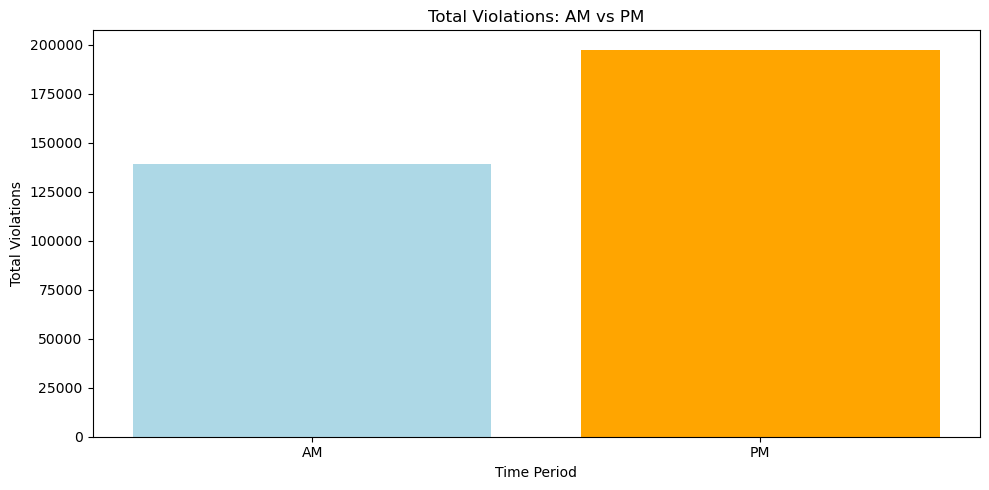

In [187]:
# Let's analyze the data: AM versus PM violation counts
am_columns = []
pm_columns = []
for column_name in violation_columns:
    if "AM" in column_name:
        am_columns.append(column_name)
    elif "PM" in column_name:
        pm_columns.append(column_name)

am_violations = mvs_copy_data[am_columns].sum().sum()
pm_violations = mvs_copy_data[pm_columns].sum().sum()

# Create a dataframe for AM vs PM violations
am_pm_summary = pd.DataFrame({
    "Time Period": ["AM", "PM"],
    "Total Violations": [am_violations, pm_violations]
})

# Display AM vs PM violations summary
print("AM vs PM Violations Summary:")
print(am_pm_summary)

# Plotting a bar chart for AM vs PM violations
plt.figure(figsize=(10, 5))
plt.bar(am_pm_summary["Time Period"], am_pm_summary["Total Violations"], color=["lightblue", "orange"])
plt.title("Total Violations: AM vs PM")
plt.xlabel("Time Period")
plt.ylabel("Total Violations")
plt.tight_layout()
plt.show()


### The data shows that there are significantly more violations during the PM time period compared to the AM time period. Specifically, the total number of PM violations (197,390) is much higher than the AM violations (139,144).

### The higher violations in the PM may be due to evening rush hour, when people are commuting home from work.

### above chart shows that more traffic violations occur during the afternoon and evening hours. The higher number of violations in the PM period could also be linked to a higher possibility of DUI (driving under the influence) incidents. 

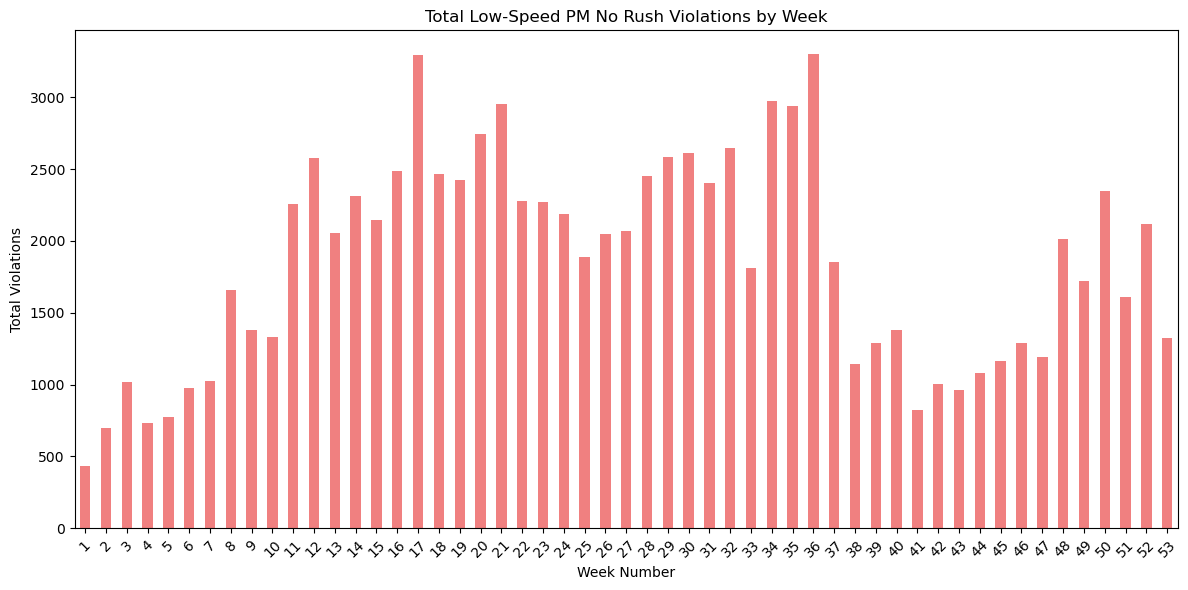

In [191]:
## I chose to visualize this low_speed_pm_no_rush because it has the highest number of moving violations.

low_speed_pm_no_rush_weekly = mvs_copy_data.groupby("WEEKNUMBER")["LOWSPEED_PM_NORUSH"].sum()

#plotting a bar chart for weekly low-speed PM no rush violations
plt.figure(figsize=(12, 6))
low_speed_pm_no_rush_weekly.plot(kind="bar", color="lightcoral")
plt.title("Total Low-Speed PM No Rush Violations by Week")
plt.xlabel("Week Number")
plt.ylabel("Total Violations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The chart shows that low-speed PM no rush violations are high in certain weeks. This could be due to more traffic or stricter enforcement during those times.

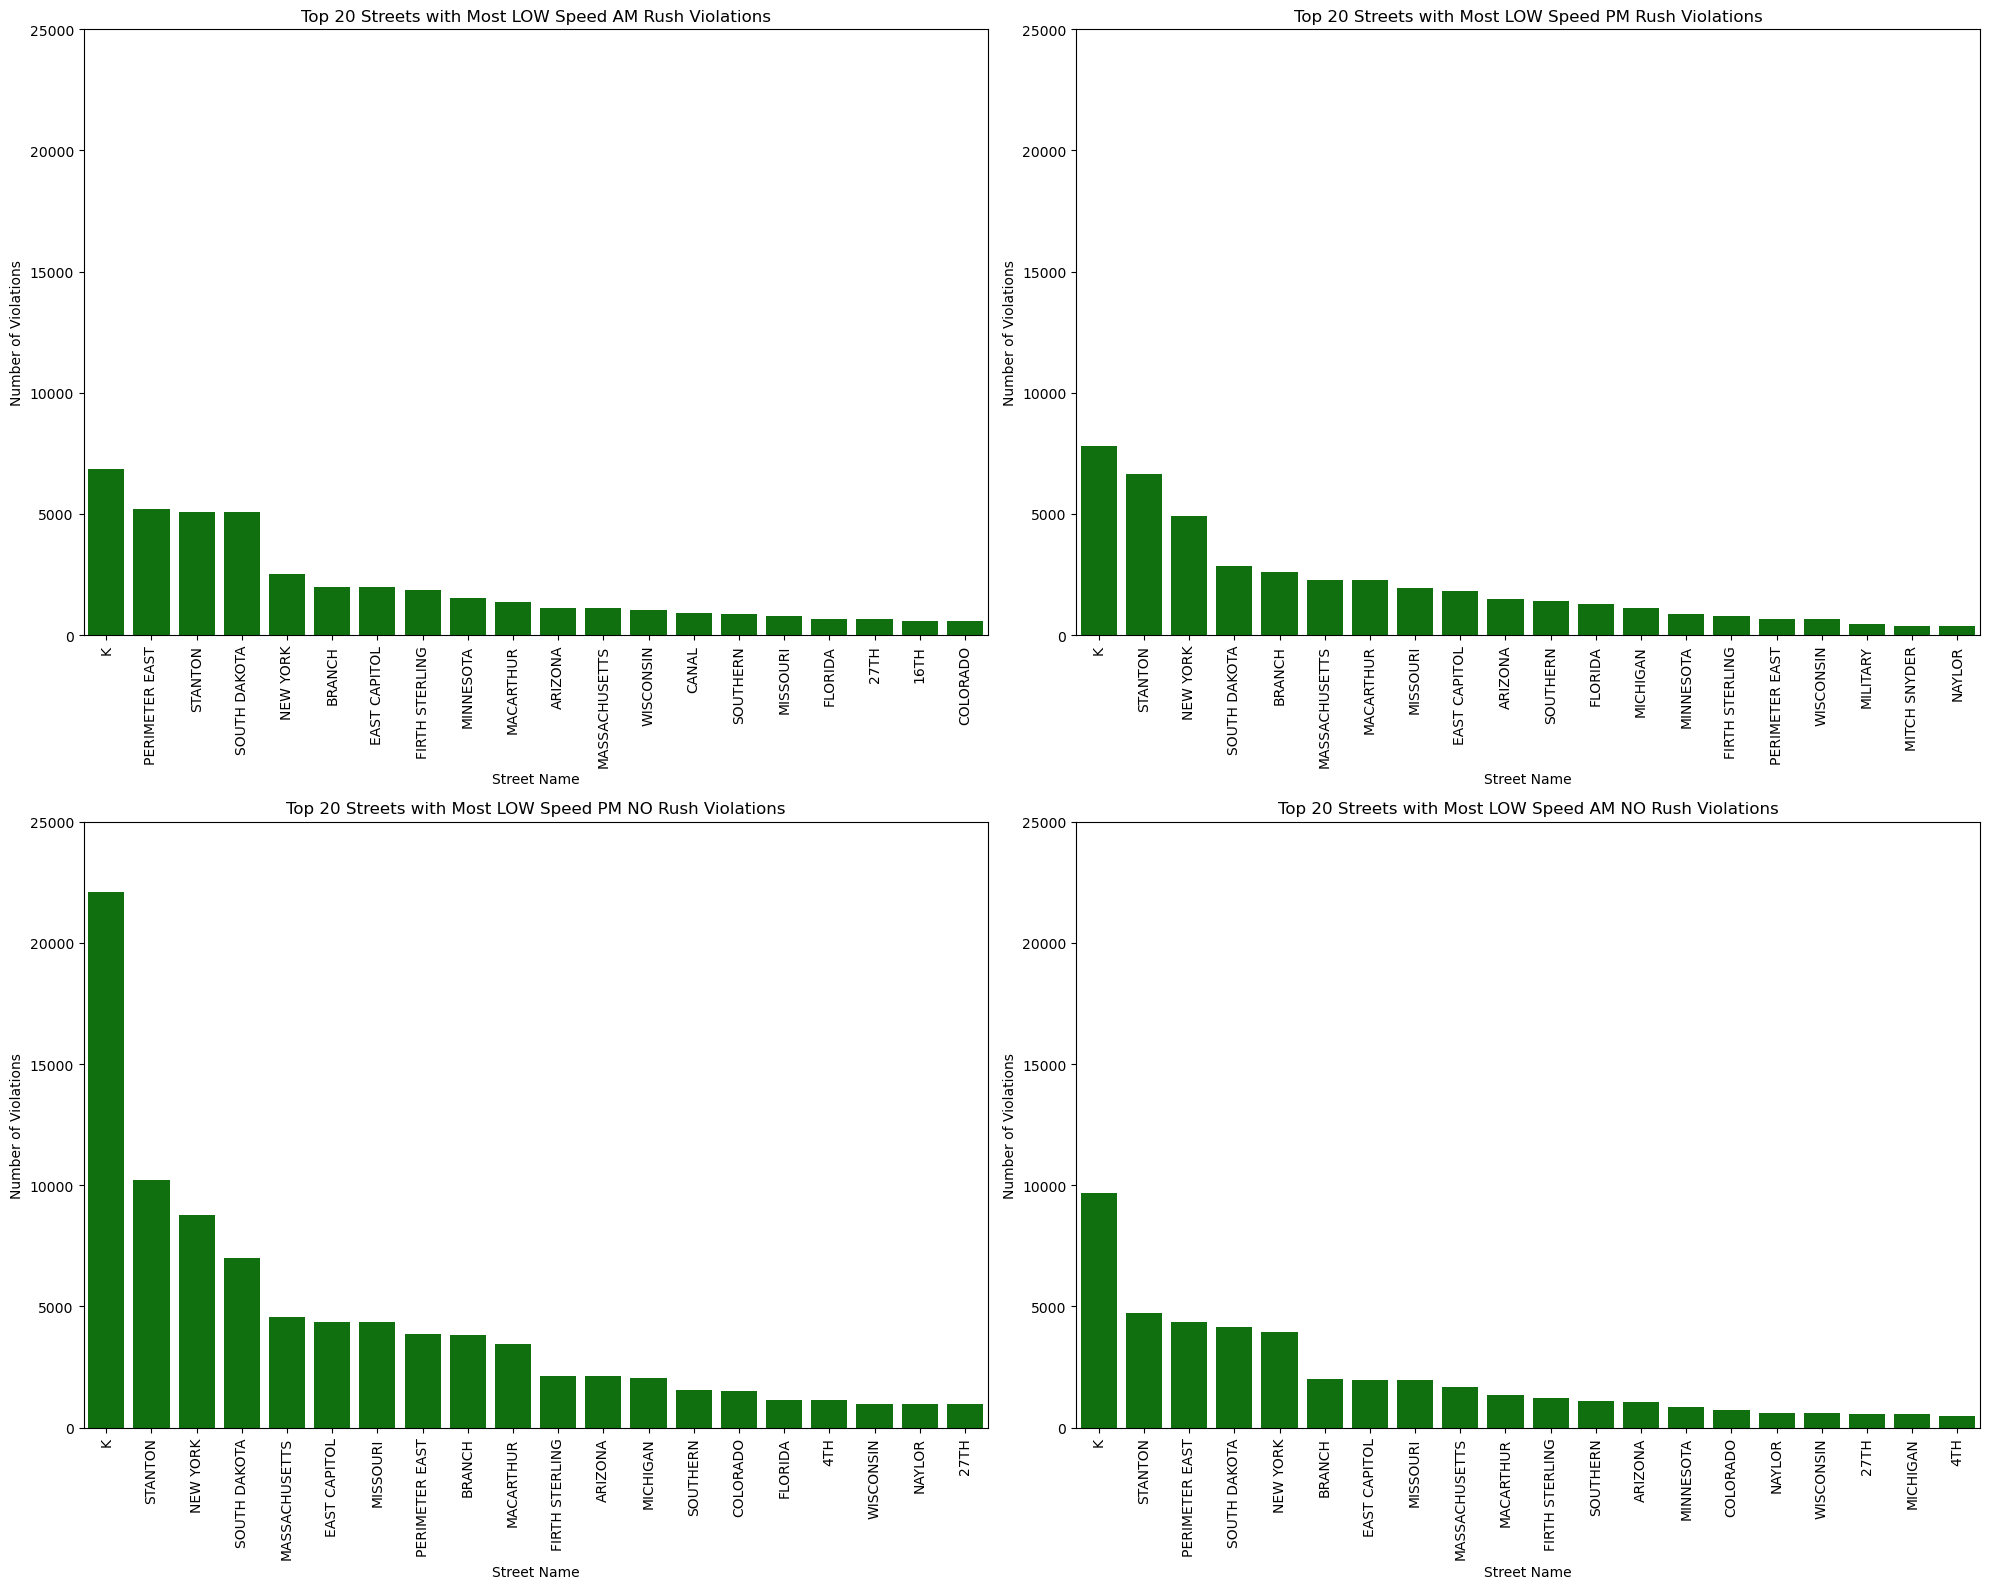

In [193]:
### Let's compare which street has the most low speed violations during different times of the day.

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
street_data = mvs_copy_data.groupby("REGISTEREDNAME").sum().reset_index()

# Select top 20 streets based on different violation columns
top_streets_am_rush = street_data.nlargest(20, "LOWSPEED_AM_RUSH")
top_streets_pm_rush = street_data.nlargest(20, "LOWSPEED_PM_RUSH")
top_streets_pm_norush = street_data.nlargest(20, "LOWSPEED_PM_NORUSH")
top_streets_am_norush = street_data.nlargest(20, "LOWSPEED_AM_NORUSH")
max_y_value = 25000

# Top 20 Streets with Most LOW Speed AM Rush Violations
sns.barplot(ax=axes[0, 0], x=top_streets_am_rush["REGISTEREDNAME"], y=top_streets_am_rush["LOWSPEED_AM_RUSH"], color="green")
axes[0, 0].set_title("Top 20 Streets with Most LOW Speed AM Rush Violations")
axes[0, 0].set_xlabel("Street Name")
axes[0, 0].set_ylabel("Number of Violations")
axes[0, 0].tick_params(axis="x", rotation=90)
axes[0, 0].set_ylim(0, max_y_value)

# Top 20 Streets with Most LOW Speed PM Rush Violations
sns.barplot(ax=axes[0, 1], x=top_streets_pm_rush["REGISTEREDNAME"], y=top_streets_pm_rush["LOWSPEED_PM_RUSH"], color="green")
axes[0, 1].set_title("Top 20 Streets with Most LOW Speed PM Rush Violations")
axes[0, 1].set_xlabel("Street Name")
axes[0, 1].set_ylabel("Number of Violations")
axes[0, 1].tick_params(axis="x", rotation=90)
axes[0, 1].set_ylim(0, max_y_value)

# Top 20 Streets with Most LOW Speed PM NO Rush Violations
sns.barplot(ax=axes[1, 0], x=top_streets_pm_norush["REGISTEREDNAME"], y=top_streets_pm_norush["LOWSPEED_PM_NORUSH"], color="green")
axes[1, 0].set_title("Top 20 Streets with Most LOW Speed PM NO Rush Violations")
axes[1, 0].set_xlabel("Street Name")
axes[1, 0].set_ylabel("Number of Violations")
axes[1, 0].tick_params(axis="x", rotation=90)
axes[1, 0].set_ylim(0, max_y_value)

# Top 20 Streets with Most LOW Speed AM NO Rush Violations
sns.barplot(ax=axes[1, 1], x=top_streets_am_norush["REGISTEREDNAME"], y=top_streets_am_norush["LOWSPEED_AM_NORUSH"], color="green")
axes[1, 1].set_title("Top 20 Streets with Most LOW Speed AM NO Rush Violations")
axes[1, 1].set_xlabel("Street Name")
axes[1, 1].set_ylabel("Number of Violations")
axes[1, 1].tick_params(axis="x", rotation=90)
axes[1, 1].set_ylim(0, max_y_value)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

### Streets like "K" and "Stanton"  consistently show high violations across different times, indicating a need for targeted enforcement. Streets like "K" and "Stanton" need increased monitoring and enforcement, particularly during  non-rush periods.

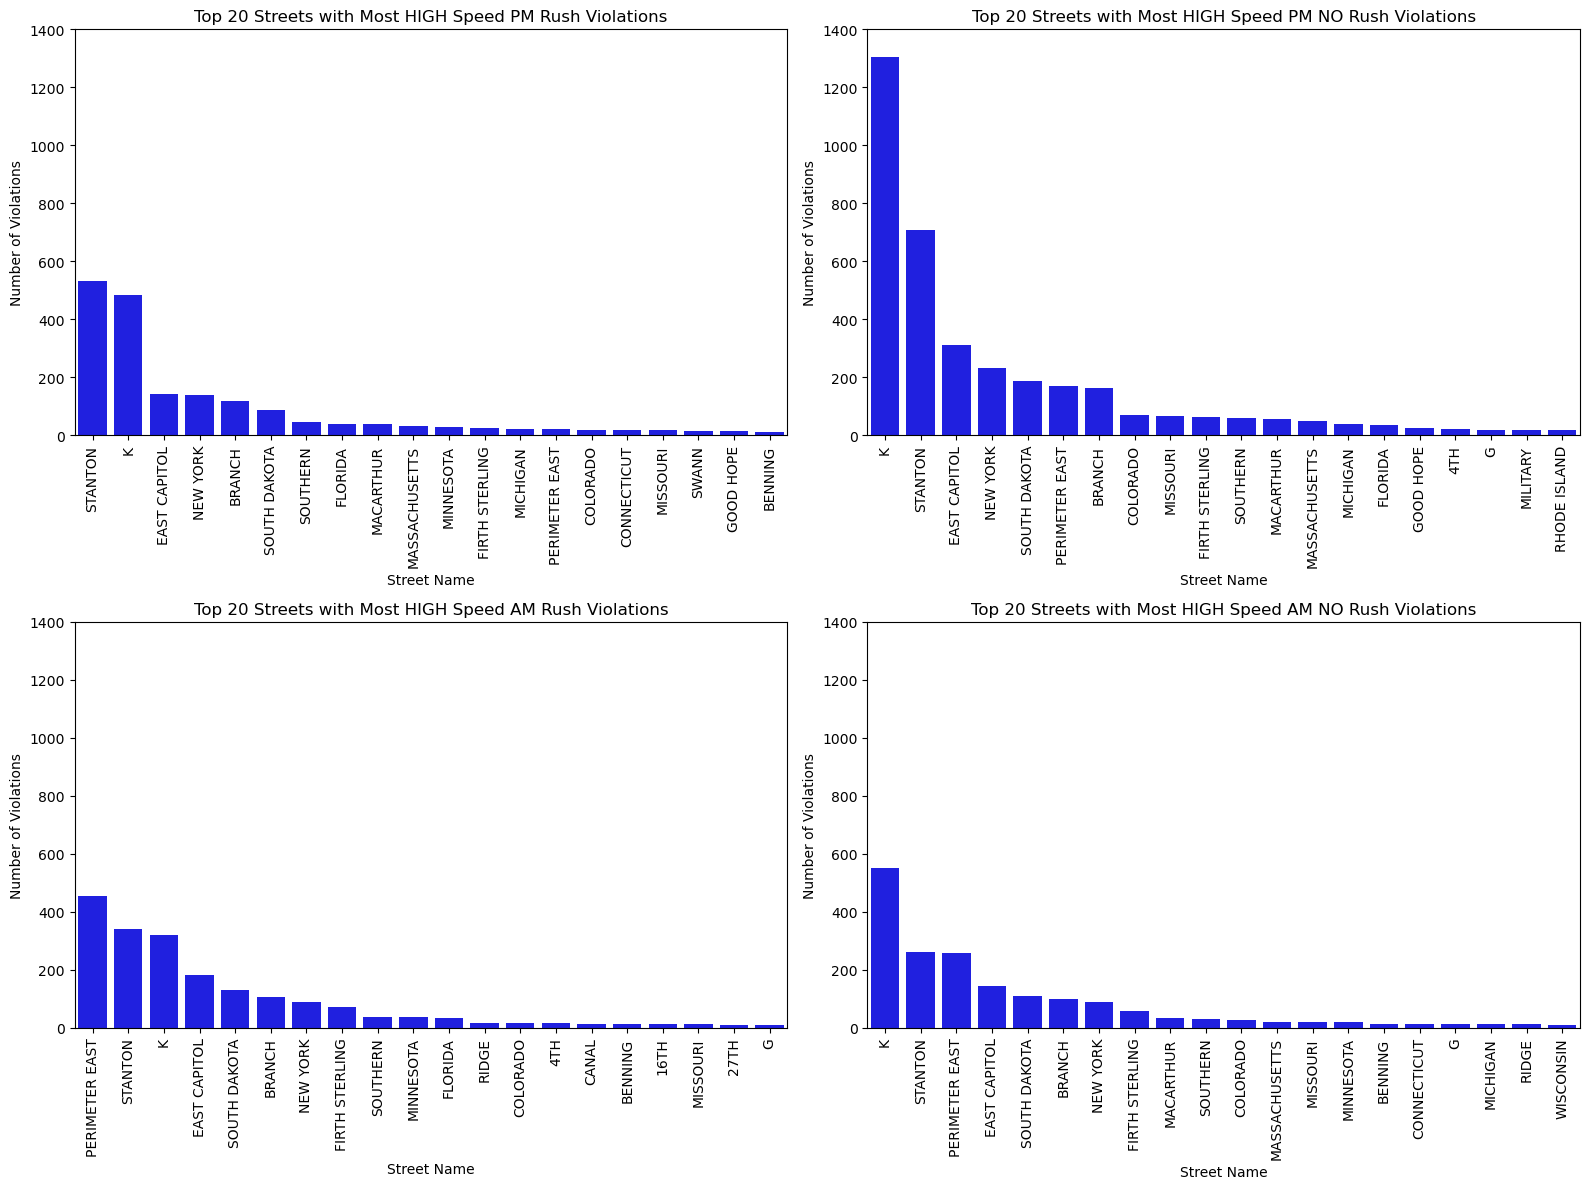

In [195]:
### Let's compare which street has the most high speed violations during different times of the day.

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
street_data = mvs_copy_data.groupby("REGISTEREDNAME").sum().reset_index()

# Select top 20 streets based on different violation columns
top_streets_pm_rush = street_data.nlargest(20, "HIGHSPEED_PM_RUSH")
top_streets_pm_norush = street_data.nlargest(20, "HIGHSPEED_PM_NORUSH")
top_streets_am_norush = street_data.nlargest(20, "HIGHSPEED_AM_NORUSH")
top_streets_am_rush = street_data.nlargest(20, "HIGHSPEED_AM_RUSH")

max_y_value = 1400
# Top 20 Streets with Most HIGH Speed PM Rush Violations
sns.barplot(ax=axes[0, 0], x=top_streets_pm_rush["REGISTEREDNAME"], y=top_streets_pm_rush["HIGHSPEED_PM_RUSH"], color="blue")
axes[0, 0].set_title("Top 20 Streets with Most HIGH Speed PM Rush Violations")
axes[0, 0].set_xlabel("Street Name")
axes[0, 0].set_ylabel("Number of Violations")
axes[0, 0].tick_params(axis="x", rotation=90)
axes[0, 0].set_ylim(0, max_y_value)

# Top 20 Streets with Most HIGH Speed PM NO Rush Violations
sns.barplot(ax=axes[0, 1], x=top_streets_pm_norush["REGISTEREDNAME"], y=top_streets_pm_norush["HIGHSPEED_PM_NORUSH"], color="blue")
axes[0, 1].set_title("Top 20 Streets with Most HIGH Speed PM NO Rush Violations")
axes[0, 1].set_xlabel("Street Name")
axes[0, 1].set_ylabel("Number of Violations")
axes[0, 1].tick_params(axis="x", rotation=90)
axes[0, 1].set_ylim(0, max_y_value)

# Top 20 Streets with Most HIGH Speed AM NO Rush Violations
sns.barplot(ax=axes[1, 1], x=top_streets_am_norush["REGISTEREDNAME"], y=top_streets_am_norush["HIGHSPEED_AM_NORUSH"], color="blue")
axes[1, 1].set_title("Top 20 Streets with Most HIGH Speed AM NO Rush Violations")
axes[1, 1].set_xlabel("Street Name")
axes[1, 1].set_ylabel("Number of Violations")
axes[1, 1].tick_params(axis="x", rotation=90)
axes[1, 1].set_ylim(0, max_y_value)

# Top 20 Streets with Most HIGH Speed AM Rush Violations
sns.barplot(ax=axes[1, 0], x=top_streets_am_rush["REGISTEREDNAME"], y=top_streets_am_rush["HIGHSPEED_AM_RUSH"], color="blue")
axes[1, 0].set_title("Top 20 Streets with Most HIGH Speed AM Rush Violations")
axes[1, 0].set_xlabel("Street Name")
axes[1, 0].set_ylabel("Number of Violations")
axes[1, 0].tick_params(axis="x", rotation=90)
axes[1, 0].set_ylim(0, max_y_value)
plt.tight_layout()
plt.show()

### AM rush violations are likely motivated by work schedules, while PM rush violations are influenced by impatience, lighter traffic and potentially increased DUI.

### In my opinion, while getting tickets for violations can make people more aware of traffic rules, it doesn't really help them navigate confusing roads and intersections effectively.

### conclusion: Based on this visualization, I would recommend that the District of Columbia needs to focus extra efforts on reducing low-speed violations and addressing the higher number of violations occurring during the summer. As we can see, K Street and Stanton have the highest number of violations across different times and categories, such as high speed, low speed, during rush hours, and non-rush hours. From this visualization, we can conclude that if violations on a certain street are high throughout all hours, it may indicate that the road is confusing, especially for those unfamiliar with it. To address this, they could consider reducing confusion by making the lanes wider and adding side pavements where drivers can safely pull over if needed.The reason behind deploying traffic police and ATE cameras is to monitor and reduce violations. However, if the violation rate remains unchanged even after installing cameras, it suggests that the problem might be due to other factors beyond just reckless driving. 

### One way to reduce heavy traffic flow is by providing affordable parking spaces and improving public transportation availability. This could encourage people to park their vehicles and use public transit, reducing road congestion. However, this might not be the most effective solution, this is just my opinion.